### 311 Data in Clinton Hill and nearby zipcodes before, during and after the asylum seeker crisis of 2022




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read in the csv file with the 311 data:

In [2]:
data_311 = pd.read_csv("../Data/311_Service_Requests_from_2010_to_Present_20251031.csv")

/var/folders/g_/2n8g0phx7kq78vywf18bt4v80000gn/T/ipykernel_4265/1678951191.py:1: DtypeWarning: Columns (17,20,31,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data_311 = pd.read_csv("../Data/311_Service_Requests_from_2010_to_Present_20251031.csv")


In [3]:
data_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,66655917,10/30/2025 01:12:50 AM,10/30/2025 01:26:08 AM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11205,140 WASHINGTON WALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693584,-73.974335,"(40.69358447078115, -73.97433535041199)"
1,66655333,10/30/2025 12:59:57 AM,NaN,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11206,265 LORIMER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704865,-73.947901,"(40.70486476695475, -73.94790099593943)"
2,66656816,10/30/2025 12:57:17 AM,10/30/2025 01:23:14 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11206,147 VERNON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695021,-73.945803,"(40.69502106409246, -73.9458026768717)"
3,66651995,10/30/2025 12:20:57 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11206,446 MARCY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700052,-73.950314,"(40.700051514386296, -73.95031386958141)"
4,66658099,10/30/2025 12:06:52 AM,10/30/2025 12:19:14 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11249,48 SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712999,-73.966331,"(40.712998877490364, -73.96633081126946)"


In [4]:
data_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [5]:
data_311 = pd.read_csv(
    "../Data/311_Service_Requests_from_2010_to_Present_20251031.csv",
    dtype = {"Incident Zip":"str", 'Unique Key': 'str', 'Incident Address': 'str'},
    parse_dates = ["Created Date"],
    
)

/var/folders/g_/2n8g0phx7kq78vywf18bt4v80000gn/T/ipykernel_4265/1635458233.py:1: DtypeWarning: Columns (17,20,31,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data_311 = pd.read_csv(


In [6]:
data_311.dtypes

Unique Key                                object
Created Date                      datetime64[ns]
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

### Resampling our data over time

To get a tally of these tweets over time we need to:
- format a column as a date time
- set the index of our dataframe to this date time column
- resample our dataframe 

In [7]:
data_311.dtypes

Unique Key                                object
Created Date                      datetime64[ns]
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [8]:
data_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,66655917,2025-10-30 01:12:50,10/30/2025 01:26:08 AM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11205,140 WASHINGTON WALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693584,-73.974335,"(40.69358447078115, -73.97433535041199)"
1,66655333,2025-10-30 00:59:57,NaN,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11206,265 LORIMER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704865,-73.947901,"(40.70486476695475, -73.94790099593943)"
2,66656816,2025-10-30 00:57:17,10/30/2025 01:23:14 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11206,147 VERNON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695021,-73.945803,"(40.69502106409246, -73.9458026768717)"
3,66651995,2025-10-30 00:20:57,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11206,446 MARCY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700052,-73.950314,"(40.700051514386296, -73.95031386958141)"
4,66658099,2025-10-30 00:06:52,10/30/2025 12:19:14 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11249,48 SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712999,-73.966331,"(40.712998877490364, -73.96633081126946)"


In [9]:
data_311.set_index("Created Date")

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2025-10-30 01:12:50,66655917,10/30/2025 01:26:08 AM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11205,140 WASHINGTON WALK,WASHINGTON WALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693584,-73.974335,"(40.69358447078115, -73.97433535041199)"
2025-10-30 00:59:57,66655333,NaN,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11206,265 LORIMER STREET,LORIMER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704865,-73.947901,"(40.70486476695475, -73.94790099593943)"
2025-10-30 00:57:17,66656816,10/30/2025 01:23:14 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11206,147 VERNON AVENUE,VERNON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695021,-73.945803,"(40.69502106409246, -73.9458026768717)"
2025-10-30 00:20:57,66651995,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11206,446 MARCY AVENUE,MARCY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700052,-73.950314,"(40.700051514386296, -73.95031386958141)"
2025-10-30 00:06:52,66658099,10/30/2025 12:19:14 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11249,48 SOUTH 4 STREET,SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712999,-73.966331,"(40.712998877490364, -73.96633081126946)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-31 10:13:37,40706647,11/01/2018 12:23:38 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11206,108 CENTRAL AVENUE,CENTRAL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700375,-73.929205,"(40.70037532781608, -73.92920494074446)"
2018-10-31 10:13:37,40705959,11/04/2018 05:01:56 PM,HPD,Department of Housing Preservation and Develop...,WATER LEAK,DAMP SPOT,RESIDENTIAL BUILDING,11206,108 CENTRAL AVENUE,CENTRAL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700375,-73.929205,"(40.70037532781608, -73.92920494074446)"
2018-10-31 10:13:37,40714499,11/04/2018 05:01:56 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11206,108 CENTRAL AVENUE,CENTRAL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700375,-73.929205,"(40.70037532781608, -73.92920494074446)"


In [10]:
indexed_311_data=data_311.set_index("Created Date")

In [34]:
tally_311=indexed_311_data.resample("M")["Unique Key"].count()
tally_311.head(20)

/var/folders/g_/2n8g0phx7kq78vywf18bt4v80000gn/T/ipykernel_4265/584010683.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tally_311=indexed_311_data.resample("M")["Unique Key"].count()


Created Date
2018-10-31     104
2018-11-30    4365
2018-12-31    3982
2019-01-31    4762
2019-02-28    3676
2019-03-31    4280
2019-04-30    4307
2019-05-31    4985
2019-06-30    5174
2019-07-31    4267
2019-08-31    4466
2019-09-30    4336
2019-10-31    3837
2019-11-30    3489
2019-12-31    3276
2020-01-31    3383
2020-02-29    2847
2020-03-31    3225
2020-04-30    3480
2020-05-31    4827
Freq: ME, Name: Unique Key, dtype: int64

In [37]:
indexed_311_data["Agency"].value_counts

<bound method IndexOpsMixin.value_counts of Created Date
2025-10-30 01:12:50    NYPD
2025-10-30 00:59:57    NYPD
2025-10-30 00:57:17    NYPD
2025-10-30 00:20:57    NYPD
2025-10-30 00:06:52    NYPD
                       ... 
2018-10-31 10:13:37     HPD
2018-10-31 10:13:37     HPD
2018-10-31 10:13:37     HPD
2018-10-31 10:13:37     HPD
2018-10-31 10:11:00    DSNY
Name: Agency, Length: 401430, dtype: object>

### Plot your data 

Now it's time to plot your data to better understand trends over time!

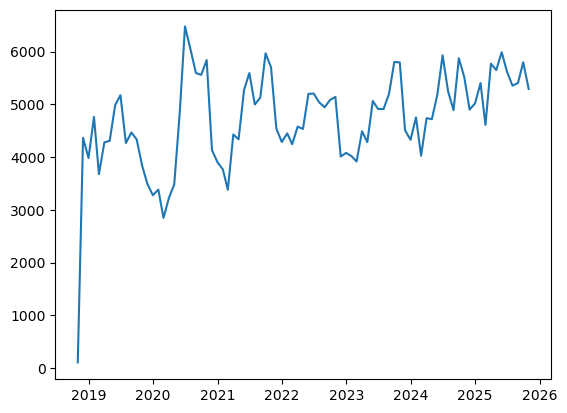

In [12]:
plt.plot(tally_311)

In [43]:
plt.plot(indexed_311_data["Agency" == "NYPD"])

KeyError: False

### Modifying your chart

First, there are so many ways to do the same thing:

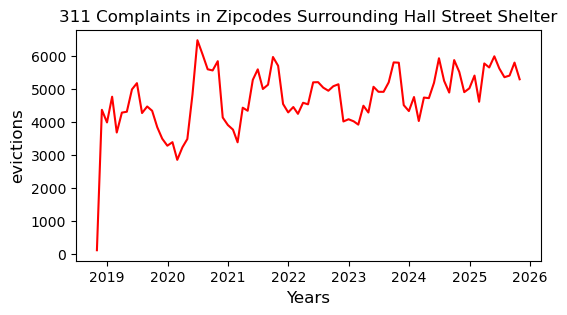

In [13]:
fig, ax = plt.subplots()
ax.plot(tally_311, color='red')
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('evictions', fontsize = 12)
ax.set_title('311 Complaints in Zipcodes Surrounding Hall Street Shelter')
fig.set_size_inches(6,3)

##### Bar Charts

In [16]:
data_311.groupby(["Incident Zip"]).agg({"Unique Key":'count'}).reset_index()

,Incident Zip,Unique Key
0,11205,126873
1,11206,185911
2,11249,88497
3,11251,149


In [18]:
data_311.groupby(["Agency"]).agg({"Unique Key":'count'}).reset_index()

,Agency,Unique Key
0,DCWP,2050
1,DEP,23137
2,DFTA,130
3,DHS,2815
4,DOB,16297
5,DOE,269
6,DOF,275
7,DOHMH,12732
8,DOITT,5
9,DOT,25704


In [21]:
zip_count = data_311["Incident Zip"].value_counts().reset_index()
zip_count

,Incident Zip,count
0,11206,185911
1,11205,126873
2,11249,88497
3,11251,149


<Axes: ylabel='Incident Zip'>

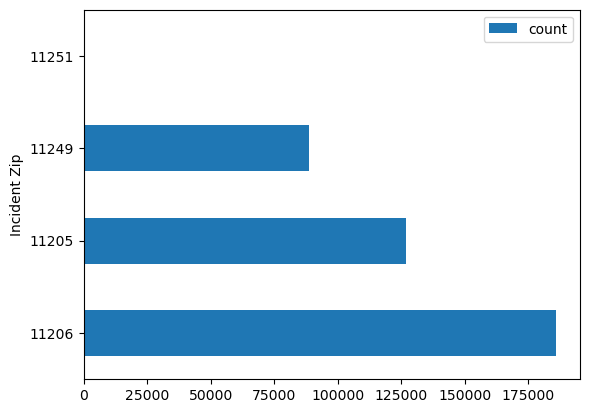

In [23]:
zip_count.plot(x="Incident Zip", y="count", kind="barh")

##### pie charts

<Axes: ylabel='count'>

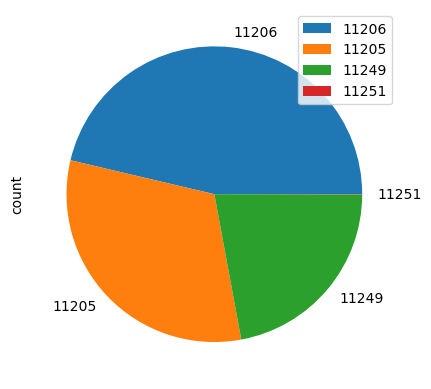

In [25]:
zip_count.plot(x="Incident Zip", y = "count", kind = "pie", labels=zip_count["Incident Zip"])

##### Multiple charts

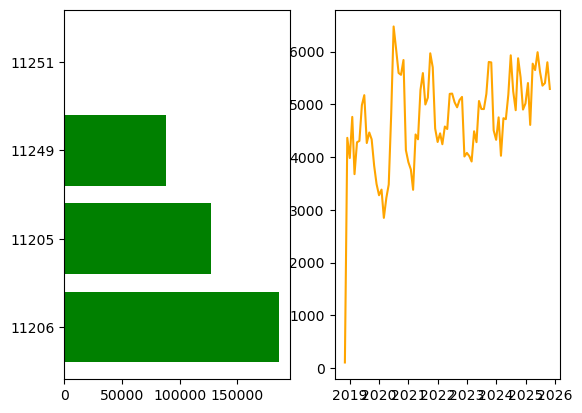

In [29]:
fig, ax = plt.subplots(1, 2)
ax[0].barh(zip_count["Incident Zip"], zip_count["count"], color = "green")
ax[1].plot(tally_311, color = 'orange')

#### Saving your charts

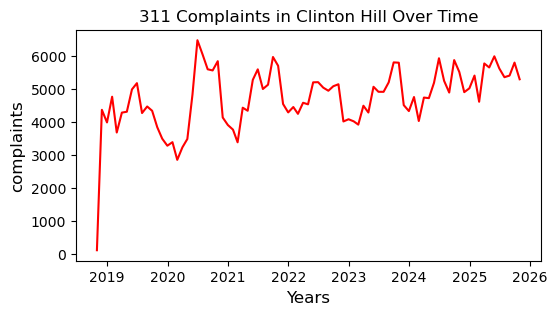

In [30]:
fig, ax = plt.subplots()
ax.plot(tally_311, color='red')
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('complaints', fontsize = 12)
ax.set_title('311 Complaints in Clinton Hill Over Time')
fig.set_size_inches(6,3)

plt.savefig("../Output/chart.png")